In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os


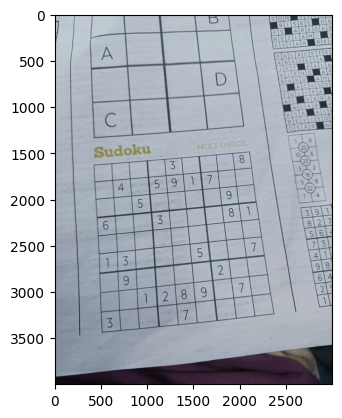

In [35]:
sudoku_a = cv2.imread('/Users/davidmarti/Library/CloudStorage/OneDrive-UAB/2n curs/semestre_2/Processament de Senyal/PSIV projecte/Fotos_Sudoku_Propies/20230512_162724.jpg')
image = sudoku_a
plt.imshow(image)
plt.show()

In [36]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convierte la imagen a escala de grises
image = cv2.GaussianBlur(image, (5,5), 0)  # Aplica un filtro Gaussiano para suavizar la imagen
(thresh, image) = cv2.threshold(image, 0, 255)  # Aplica umbralización para convertir la imagen en blanco y negro
plt.imshow(image)
plt.show()

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'threshold'
> Overload resolution failed:
>  - threshold() missing required argument 'type' (pos 4)
>  - threshold() missing required argument 'type' (pos 4)


In [ ]:
# image = cv2.Canny(image)  # Detecta los bordes de la imagen mediante el algoritmo de Canny
# plt.imshow(image)
# plt.show()


In [23]:
contours, hierarchy = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
cv2.drawContours(image, [contours], -1, (0,255,0), 3)  # Dibuja el contorno del tablero de Sudoku en la imagen original con un color verde
plt.imshow(image)
plt.show()

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type


In [6]:
def find_corners(contours):
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]  # Ordena los contornos por su área de mayor a menor y toma los 10 más grandes
    Requadre_sudoku = None

    for c in contours:
        perimetre = cv2.arcLength(c, True)  # Calcula el perímetro del contorno
        aproximacio = cv2.approxPolyDP(c, 0.02*perimetre, True)  # Aproxima el contorno a un polígono con menos vértices

        if len(aproximacio) == 4:  # Si el polígono tiene 4 vértices, se considera que es el contorno del tablero de Sudoku
            Requadre_sudoku = aproximacio
            break

    return Requadre_sudoku

EXECUCIÓ

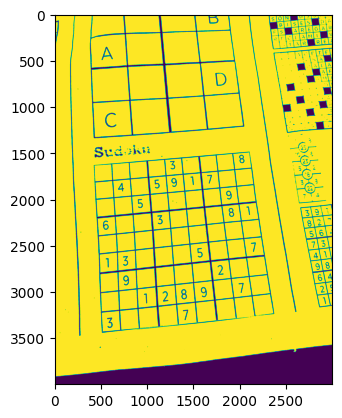

In [9]:
img, thr = prepare_image(sudoku_a)
contours = findContours(img)[0]
corners = find_corners(contours)
img_draw = draw_contours(sudoku_a, corners)

